## Exercise 10 : Data Visualization II

This assignment uses data from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/), a popular repository for machine learning datasets. In particular, we will be using the "Individual household electric power consumption Data Set" which can be downloaded from the link given below:

**Dataset:** [Electric power consumption](https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip) [20Mb]

**Description:** Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

The following descriptions of the 9 variables in the dataset are taken from the UCI web site:

1. **Date:** Date in format dd/mm/yyyy
2. **Time:** time in format hh:mm:ss
3. **Global_active_power:** household global minute-averaged active power (in kilowatt)
4. **Global_reactive_power:** household global minute-averaged reactive power (in kilowatt)
5. **Voltage:** minute-averaged voltage (in volt)
6. **Global_intensity:** household global minute-averaged current intensity (in ampere)
7. **Sub_metering_1:** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **Sub_metering_2:** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **Sub_metering_3:** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Loading the data

When loading the dataset, please consider the following:

The dataset has 2,075,259 rows and 9 columns. 

For this exercise, we will only be using data from the dates 2007-02-01 and 2007-02-02. One alternative is to read the data from just those dates rather than reading in the entire dataset and subsetting to those dates.

### Making Plots

Our overall goal here is simply to examine how household energy usage varies over a 2-day period in February, 2007. Your task is to reconstruct the following plots below, all of which were constructed using the matplotlib plotting system.

For each plot you should

- Construct the plot and save it to a PNG file with a width of 480 pixels and a height of 480 pixels.

- Name each of the plot files as plot1.png, plot2.png, etc.

- Add the PNG file and assignment2.ipynb file to your git repository

- When you are finished with the assignment, push your git repository to GitHub so that the GitHub version of your repository is up to date. There should be four PNG files and one assignment2.ipynb files.

- The four plots that you will need to construct are shown below.


In [134]:
#your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [168]:
#read the data
#path = "../../data/week04/household_power_consumption.txt"

df = pd.read_csv("../../data/week04/household_power_consumption.txt", sep=';', na_values='?')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [192]:
#add one colue DateTime
#df.insert(0, 'Date_Time', df.Date + ' ' +df.Time)
df.head()

,Date_Time,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,2007-02-01 00:00:00,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,2007-02-01 00:01:00,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,2007-02-01 00:02:00,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,2007-02-01 00:03:00,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,2007-02-01 00:04:00,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [171]:
# choose date 2007-02-01 and 2007-02-02.

df = df[((df.Date == '1/2/2007') | (df.Date == '2/2/2007'))]

In [174]:
# convert to datetime

df['Date_Time'] = pd.to_datetime(df['Date_Time'], format = "%d/%m/%Y %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 66636 to 69515
Data columns (total 10 columns):
Date_Time                2880 non-null datetime64[ns]
Date                     2880 non-null object
Time                     2880 non-null object
Global_active_power      2880 non-null float64
Global_reactive_power    2880 non-null float64
Voltage                  2880 non-null float64
Global_intensity         2880 non-null float64
Sub_metering_1           2880 non-null float64
Sub_metering_2           2880 non-null float64
Sub_metering_3           2880 non-null float64
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 247.5+ KB


In [151]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.212672,0.100627,240.363264,5.101667,0.406250,0.257639,8.501042
std,1.051519,0.093197,2.494777,4.395368,3.654527,0.554383,8.730857
min,0.220000,0.000000,233.050000,1.000000,0.000000,0.000000,0.000000
25%,0.320000,0.000000,238.437500,1.400000,0.000000,0.000000,0.000000
50%,1.060000,0.104000,240.555000,4.600000,0.000000,0.000000,0.000000
75%,1.688500,0.144000,242.440000,7.000000,0.000000,0.000000,17.000000
max,7.482000,0.500000,246.570000,32.000000,38.000000,2.000000,19.000000


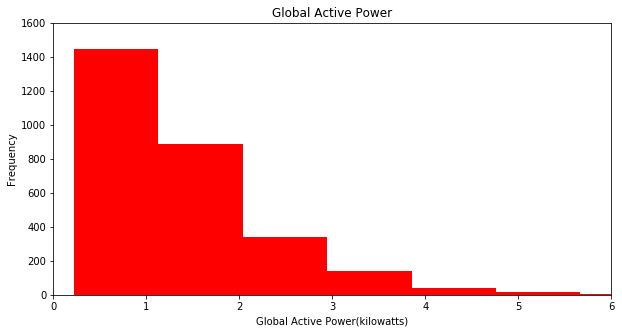

In [222]:
# plot 1

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df['Global_active_power'], color = 'r', bins=8)
ax.set_title("Global Active Power")
ax.set_xlabel("Global Active Power(kilowatts)")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 6)
ax.set_ylim(0, 1600);

plt.savefig("plot1.png", dpi=480)

<img src ='images/plot1.png'>

Plot 1

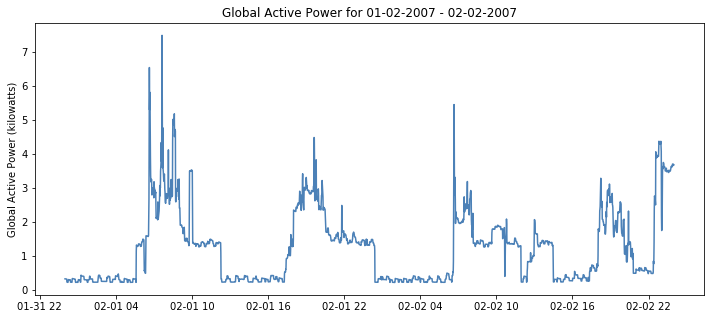

In [226]:
#plot2

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df['Date_Time'],df['Global_active_power'], color = "#004C99", alpha=0.7)
ax.set_title("Global Active Power for 01-02-2007 - 02-02-2007")
ax.set_ylabel("Global Active Power (kilowatts)");

plt.savefig("plot2.png", dpi=480)

<img src='images/plot2.png'>

Plot 2

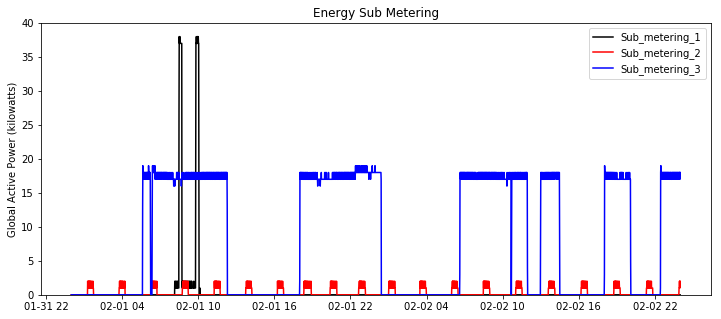

In [225]:
#plot3

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df['Date_Time'], df['Sub_metering_1'], color = "black")
ax.plot(df['Date_Time'], df['Sub_metering_2'], color = "r")
ax.plot(df['Date_Time'], df['Sub_metering_3'], color = "b")
ax.legend(loc=0)
ax.set_title("Energy Sub Metering")
ax.set_ylabel("Global Active Power (kilowatts)")
ax.set_ylim(0, 40);

plt.savefig("plot3.png", dpi=480)

<img src ='images/plot3.png'>

Plot 3

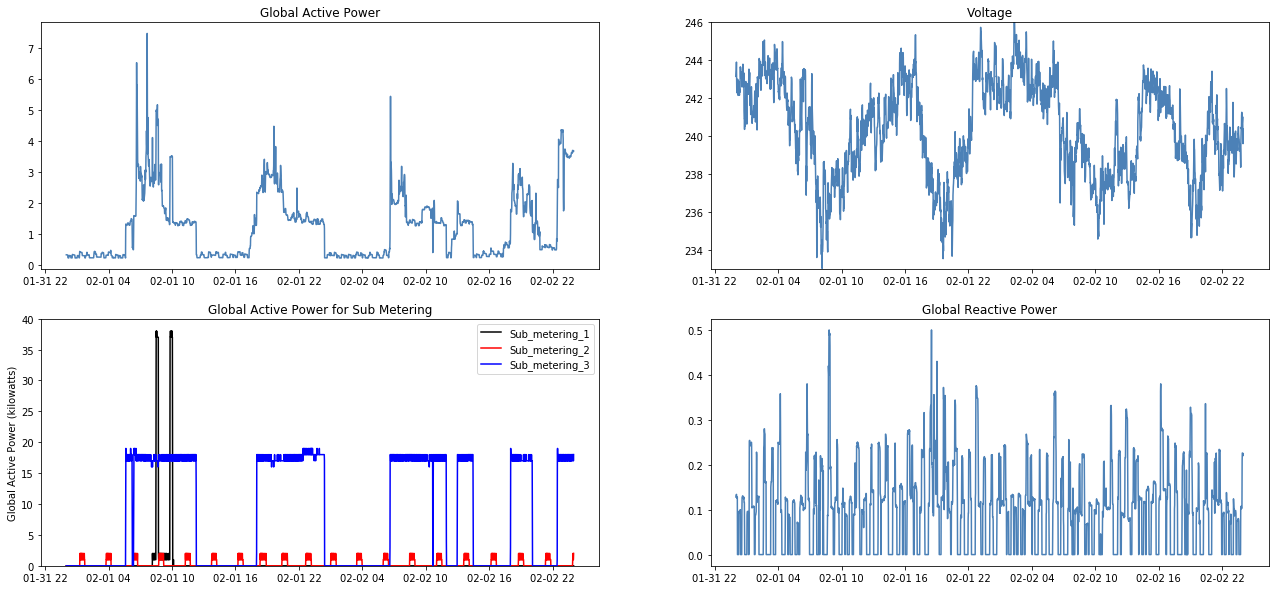

In [227]:
#plot 4

fig, ax = plt.subplots(2,2, figsize=(22,10))

ax[0,0].plot(df['Date_Time'], df['Global_active_power'], color = "#004C99", alpha=0.7)
ax[0,0].set_title("Global Active Power")

ax[1,0].plot(df['Date_Time'], df['Sub_metering_1'], color = "black")
ax[1,0].plot(df['Date_Time'], df['Sub_metering_2'], color = "r")
ax[1,0].plot(df['Date_Time'], df['Sub_metering_3'], color = "b")
ax[1,0].legend(loc=0)
ax[1,0].set_title("Global Active Power for Sub Metering")
ax[1,0].set_ylabel("Global Active Power (kilowatts)")
ax[1,0].set_ylim(0, 40)

ax[0,1].plot(df['Date_Time'], df['Voltage'], color = "#004C99", alpha=0.7)
ax[0,1].set_title("Voltage")
ax[0,1].set_ylim(233, 246)

ax[1,1].plot(df['Date_Time'], df['Global_reactive_power'], color = "#004C99", alpha=0.7)
ax[1,1].set_title("Global Reactive Power");

plt.savefig("plot4.png", dpi=480)

<img src='images/plot4.png'>

Plot4